In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:/Users/Daria/OneDrive/d6cf279f-ec27-4fa3-bc82-1b85ddf89024.xls.xlsx", 
                   skiprows = [0], names = ['Country', 'Share'])

In [3]:
df['Share'] = [round(val*100) for val in df['Share']]
df[50:90]

,Country,Share
50,Gibraltar,0.0
51,Greenland,70.0
52,Greece,24.0
53,Guatemala,69.0
54,Haiti,9.0
55,Honduras,44.0
56,Hong Kong,0.0
57,Hungary,65.0
58,Iceland,100.0
59,India,18.0


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
from slugify import slugify
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

In [5]:
data = df
shapefile = "C:/Users/Daria/OneDrive/shapefiles/ne_10m_admin_0_countries_lakes"

In [6]:
num_colors = 50

In [7]:
title = 'Доля низкоуглеродной генерации, %'
imgfile = '{}.eps'.format(slugify(title))

In [8]:
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')

In [9]:
df['CODES'] = [mapper(i) for i in df['Country']]

In [10]:
df[df.CODES.isin([None])]

,Country,Share,CODES
23,People's Republic of China,25.0,None
30,Curaçao,4.0,None
61,Islamic Republic of Iran,7.0,None
71,Korea,30.0,None
124,Chinese Taipei,20.0,None


In [11]:
df.ix[23, 'CODES'] = 'CHN'
df.ix[30, 'CODES'] = 'CUW'
df.ix[61, 'CODES'] = 'IRN'
df.ix[71, 'CODES'] = 'KOR'
df.ix[124, 'CODES'] = 'TWN'

In [12]:
values = df['Share']

In [13]:
gc = GeonamesCache()
iso3_codes = df['CODES'].values

In [14]:
df.set_index(df['CODES'].values, inplace = True)

In [15]:
df = df.ix[iso3_codes].dropna()

In [16]:
df

,Country,Share,CODES
ALB,Albania,100.0,ALB
DZA,Algeria,0.0,DZA
AGO,Angola,53.0,AGO
ARG,Argentina,36.0,ARG
ARM,Armenia,58.0,ARM
AUS,Australia,15.0,AUS
AUT,Austria,82.0,AUT
AZE,Azerbaijan,6.0,AZE
BHR,Bahrain,0.0,BHR
BGD,Bangladesh,1.0,BGD


In [17]:
cm = plt.get_cmap('Blues')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(df['Share'], bins) - 1

In [18]:
df

,Country,Share,CODES,bin
ALB,Albania,100.0,ALB,49
DZA,Algeria,0.0,DZA,0
AGO,Angola,53.0,AGO,25
ARG,Argentina,36.0,ARG,17
ARM,Armenia,58.0,ARM,28
AUS,Australia,15.0,AUS,7
AUT,Austria,82.0,AUT,40
AZE,Azerbaijan,6.0,AZE,2
BHR,Bahrain,0.0,BHR,0
BGD,Bangladesh,1.0,BGD,0


In [19]:
mpl.style.use('classic')
fig = plt.figure(figsize=(44, 24))

In [20]:
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(title, fontsize=30, y=.95)

In [21]:
m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

In [22]:
m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)

(255,
 5,
 [-179.9999999999999, -89.99999999999996, 0.0, 0.0],
 [180.00000000000028, 83.63410065300016, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x22ade129390>)

In [23]:
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dbdbdb'
    else:
        color = scheme[df.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

In [24]:
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

In [25]:
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

In [26]:
plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)

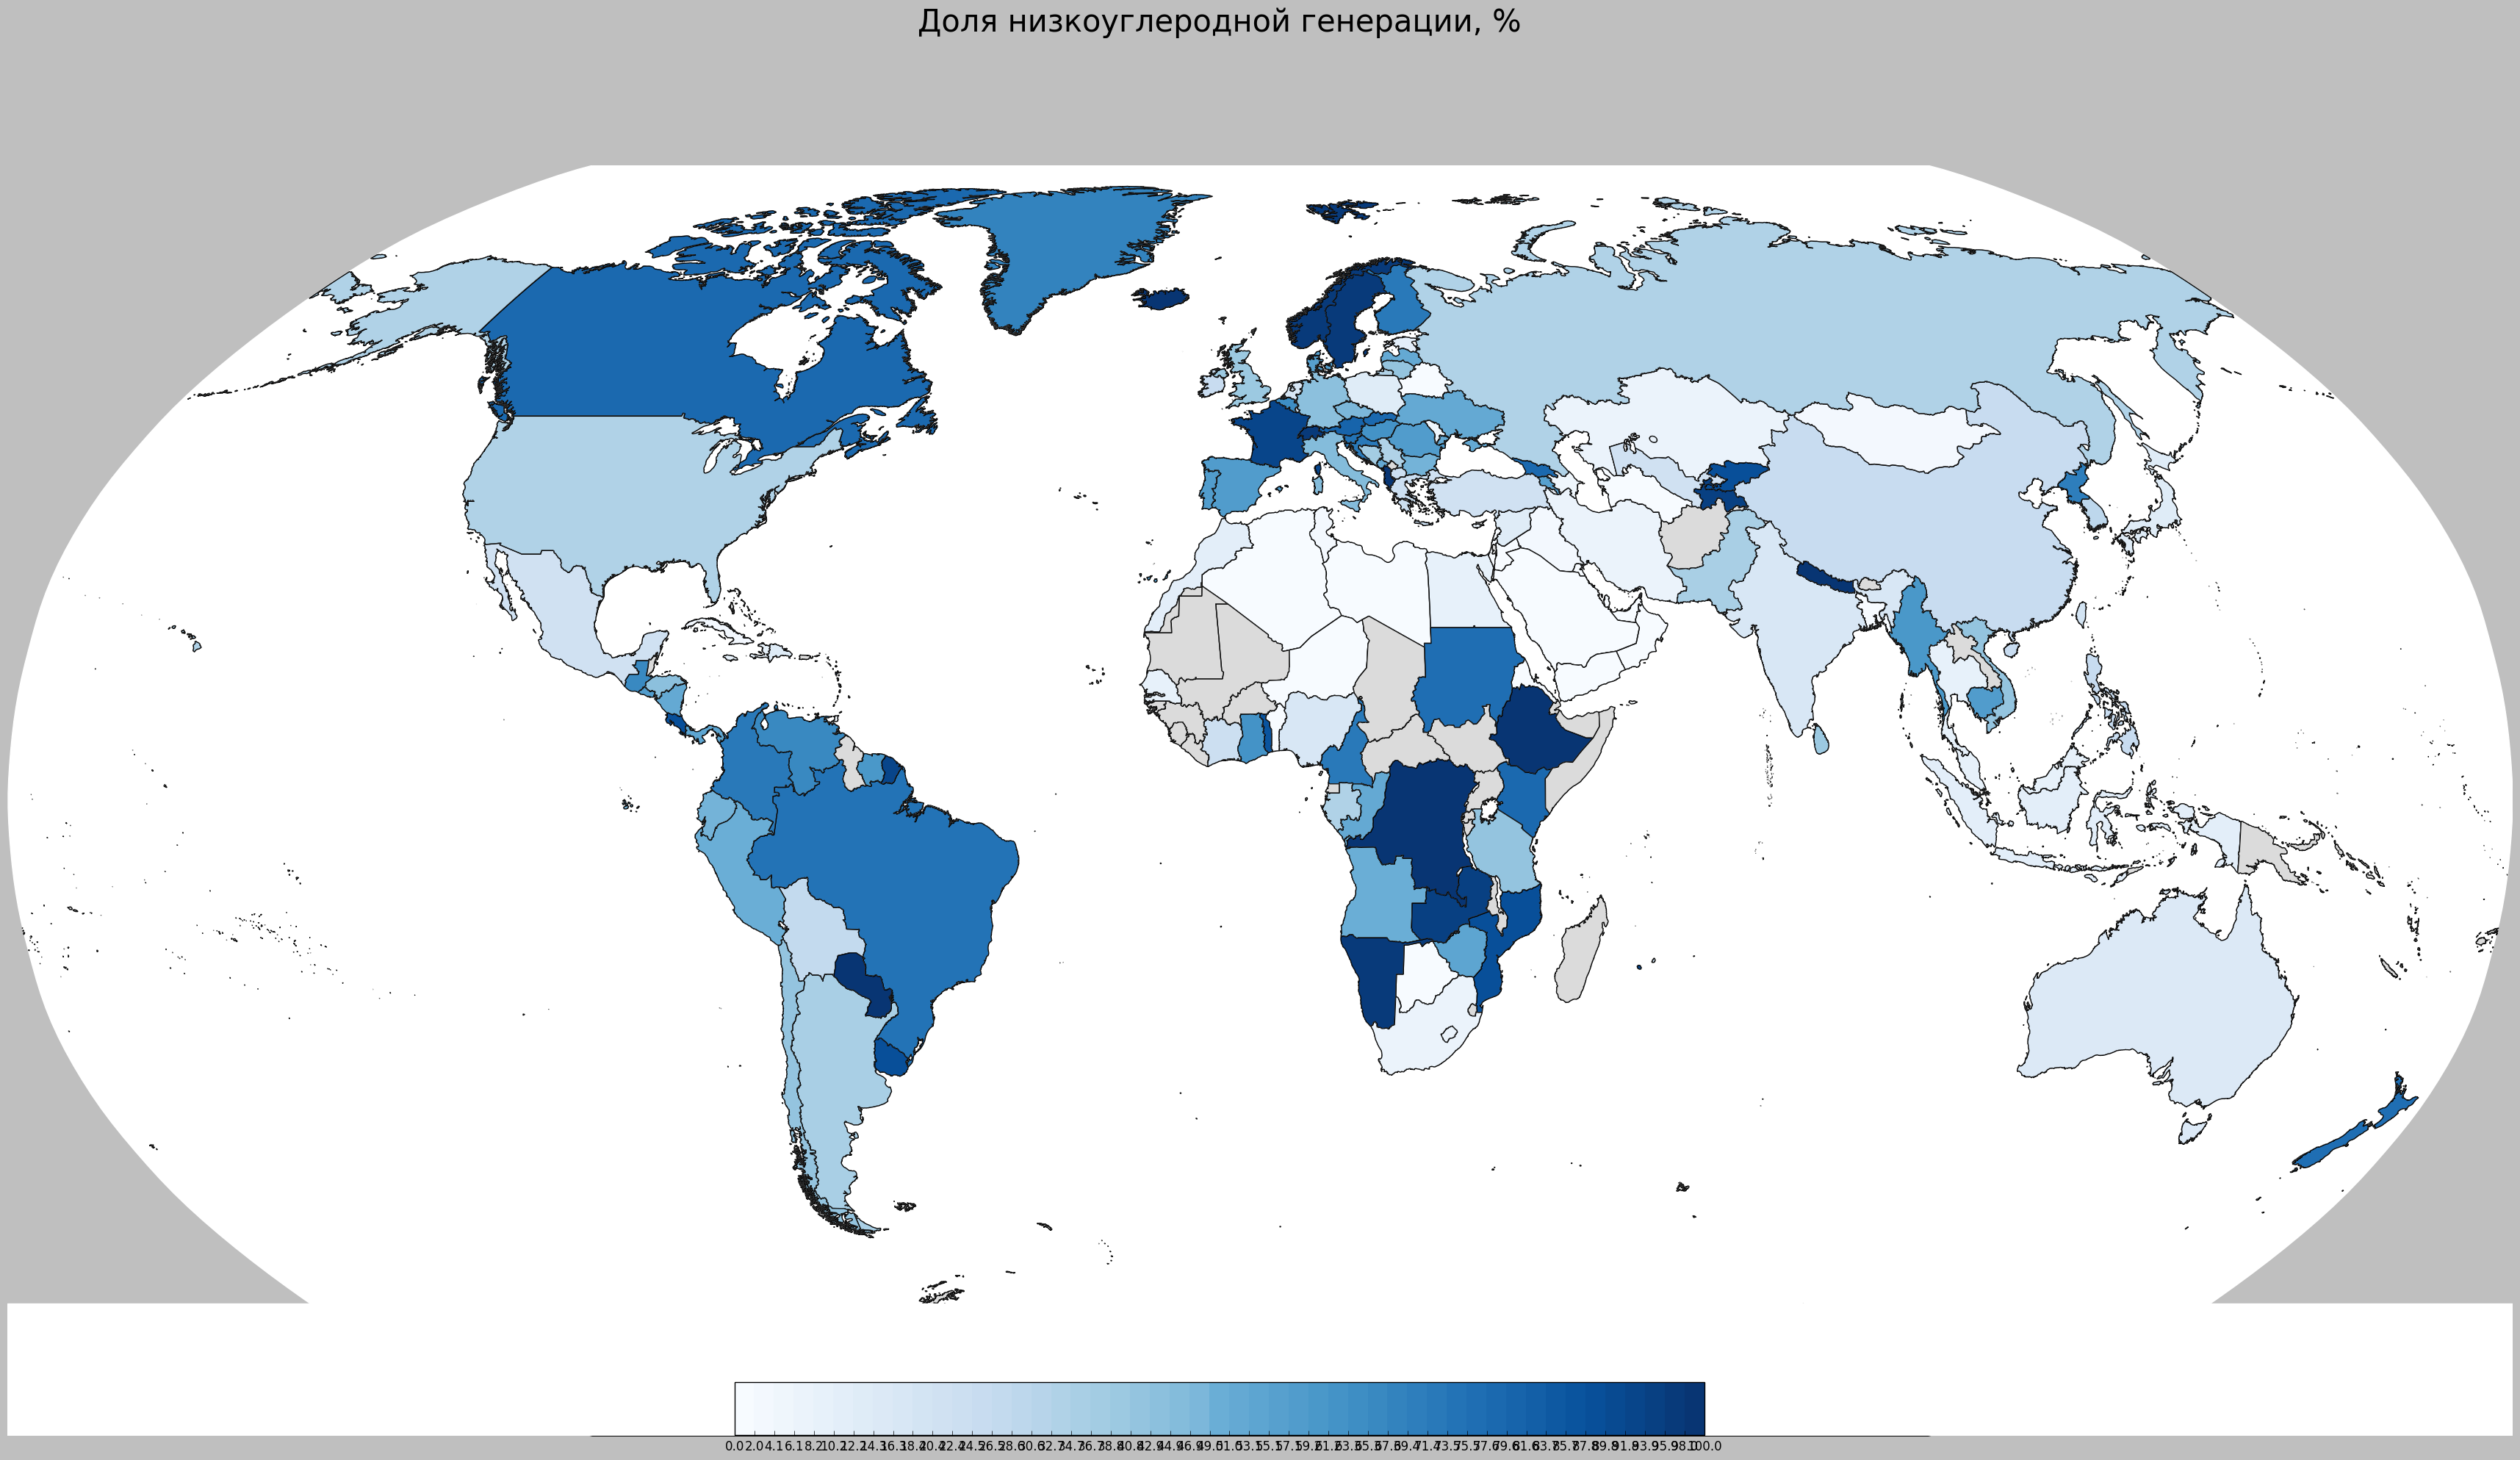

In [27]:
plt.show(imgfile)